In [2]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

### Read the Cleaned Data

In [3]:
cleaned_data_file = '../data/clean_data.csv'

In [4]:
df_init = pd.read_csv(cleaned_data_file, index_col=False)

In [6]:
df_init.head(3)

Date  Temperature         DHI        DNI   Radiation  Precipitation  \
0  2018-12-31    17.954545   83.545455  11.181818   85.909091      30.100000   
1  2019-01-01    17.145455  119.818182   9.000000  122.454545      32.600000   
2  2019-01-02    13.372727   74.181818   5.363636   74.636364      29.018182   

    Humidity    Pressure  WindDirection  WindSpeed  Sunrise  Sunset  Month  
0  93.272727  985.781818     182.181818   5.363636        0       0     12  
1  85.090909  988.036364     293.454545   2.009091        0       0      1  
2  83.090909  989.472727     271.727273   0.736364        0       0      1

### Plot the Total Monthly Solar Radiation

***Note: the monthly radiation is equal to the sum of three years of respective monthly radiation [2019,2020,2021]

In [8]:
df_init.head(10)

Date  Temperature         DHI         DNI   Radiation  Precipitation  \
0  2018-12-31    17.954545   83.545455   11.181818   85.909091      30.100000   
1  2019-01-01    17.145455  119.818182    9.000000  122.454545      32.600000   
2  2019-01-02    13.372727   74.181818    5.363636   74.636364      29.018182   
3  2019-01-03    12.481818   60.272727    0.000000   60.272727      32.000000   
4  2019-01-04    14.909091   91.090909  110.000000  128.636364      24.436364   
5  2019-01-05    10.863636   57.363636  615.000000  315.090909      11.236364   
6  2019-01-06    13.409091   42.545455  695.727273  324.363636      10.372727   
7  2019-01-07    13.972727   61.181818  607.909091  314.545455      12.681818   
8  2019-01-08    15.109091  124.909091   32.363636  132.363636      19.409091   
9  2019-01-09     7.436364   44.090909  734.000000  342.363636       4.190909   

    Humidity    Pressure  WindDirection  WindSpeed  Sunrise  Sunset  Month  
0  93.272727  985.781818     182.181818   5.363636        0       0     12  
1  85.090909  988.036364     293.454545   2.009091        0       0      1  
2  83.090909  989.472727     271.727273   0.736364        0       0      1  
3  92.181818  985.063636     340.909091   1.545455        0       0      1  
4  95.090909  975.718182     203.090909   5.545455        0       0      1  
5  55.818182  984.363636     304.636364   5.263636        0       0      1  
6  60.272727  990.100000     302.090909   1.218182        0       0      1  
7  64.363636  990.809091     162.818182   3.472727        0       0      1  
8  77.363636  987.409091     247.454545   4.345455        0       0      1  
9  40.363636  989.172727     313.727273   6.500000        0       0      1

In [23]:
month_vs_radiation = df_init.loc[:, ['Radiation','Month']].groupby('Month').sum()

In [26]:
month_vs_radiation

Radiation
Month              
1      21296.727273
2      20142.424242
3      30444.025641
4      40137.121245
5      40819.904762
6      35660.600000
7      37964.395238
8      37393.668498
9      35240.153846
10     28299.331585
11     27196.303030
12     19602.227273

Text(0.5, 1.0, 'Total Monthly Solar Radiation: 2019, 2020, 2021')

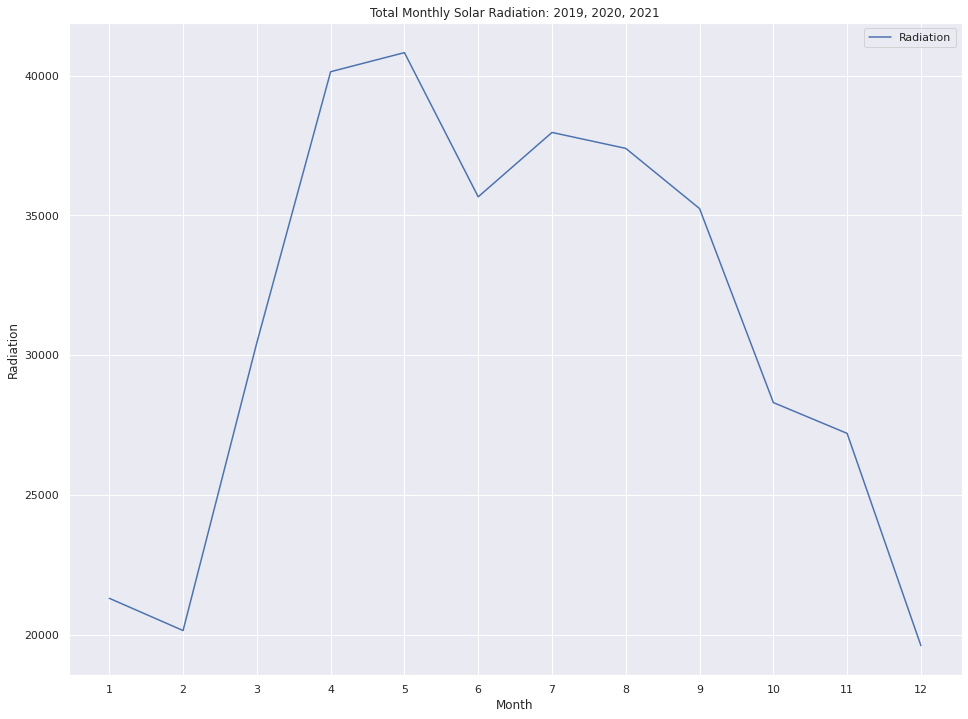

In [39]:
month_vs_radiation.plot()
plt.xticks(month_vs_radiation.index)
plt.xlabel('Month')
plt.ylabel('Radiation')
plt.title('Total Monthly Solar Radiation: 2019, 2020, 2021')

### Plot the Daily Solar Radiation

<AxesSubplot:xlabel='Date', ylabel='Radiation'>

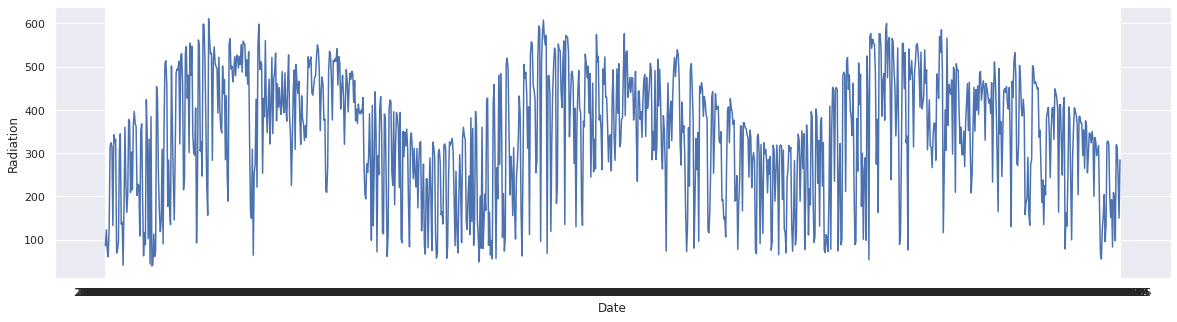

In [52]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=df_init, x="Date", y="Radiation")


# mean_radiation = df_init['Radiation'].mean()
# ax.axhline(mean_radiation, color='green', linetype='--', label=f"Mean - {mean_radiation:.2f}")

# ax.set_axisbelow(True)
# ax.minorticks_on()
# ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
# ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

# plt.show()
# ax.legend()

### Histogram Distribution of Weather Features & Solar Radiations

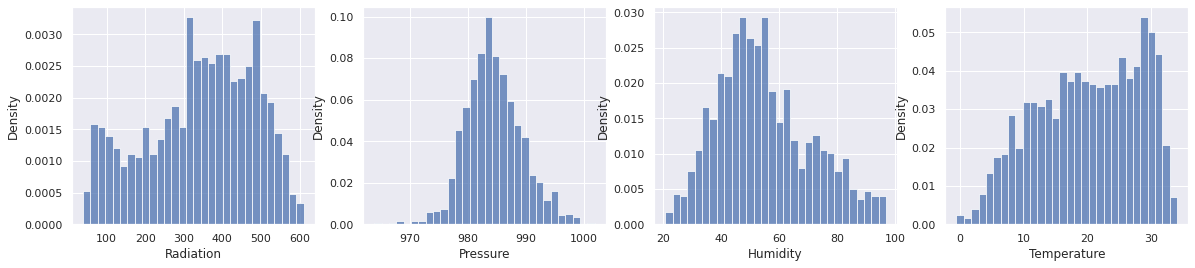

In [63]:
f, ax = plt.subplots(1, 4, figsize=(20,4))

sns.histplot(df_init['Radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(df_init['Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(df_init['Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(df_init['Temperature'], stat="density", bins=30, ax=ax[3])

plt.show()

### Histogram Plot of Daily Mean Radiation

Text(0.5, 1.0, 'Daily Radiation')

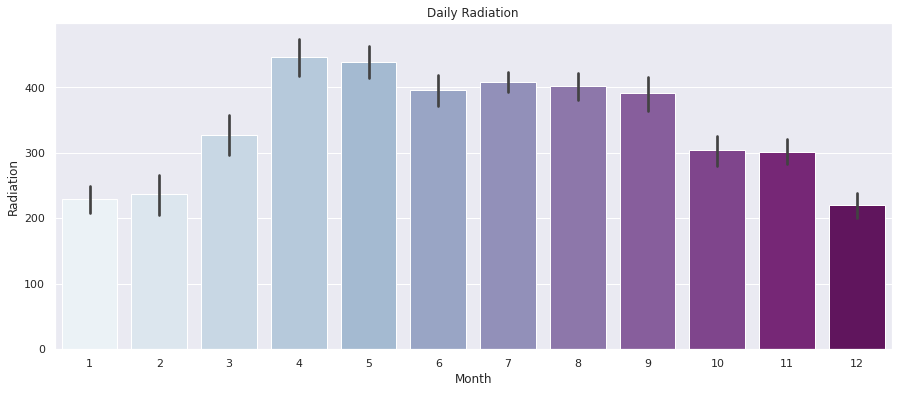

In [76]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x="Month", y='Radiation', data= df_init, palette='BuPu')

ax.set_title("Daily Radiation")

### Plotting Feature Correlations 

In [78]:
 df_init.corr(method = "pearson").shape

(12, 12)

In [80]:
df_correlation =  df_init.corr(method = "pearson")
df_correlation

Temperature       DHI       DNI  Radiation  Precipitation  \
Temperature       1.000000  0.618052 -0.078110   0.437123       0.735321   
DHI               0.618052  1.000000 -0.479829   0.150366       0.609302   
DNI              -0.078110 -0.479829  1.000000   0.753814      -0.567122   
Radiation         0.437123  0.150366  0.753814   1.000000      -0.132068   
Precipitation     0.735321  0.609302 -0.567122  -0.132068       1.000000   
Humidity         -0.084580  0.113527 -0.749556  -0.722447       0.446937   
Pressure         -0.310970 -0.213262  0.275944   0.094000      -0.385125   
WindDirection    -0.077672 -0.137843  0.258418   0.178327      -0.200744   
WindSpeed        -0.342036 -0.201960 -0.039778  -0.176280      -0.214009   
Sunrise           0.153501  0.151345 -0.018763   0.105305       0.107658   
Sunset            0.124685  0.105314 -0.010974   0.118425       0.130784   
Month             0.219685 -0.040521  0.074591  -0.003790       0.133031   

               Humidity  Pressure  WindDirection  WindSpeed   Sunrise  \
Temperature   -0.084580 -0.310970      -0.077672  -0.342036  0.153501   
DHI            0.113527 -0.213262      -0.137843  -0.201960  0.151345   
DNI           -0.749556  0.275944       0.258418  -0.039778 -0.018763   
Radiation     -0.722447  0.094000       0.178327  -0.176280  0.105305   
Precipitation  0.446937 -0.385125      -0.200744  -0.214009  0.107658   
Humidity       1.000000 -0.323885      -0.166643   0.157345 -0.022306   
Pressure      -0.323885  1.000000      -0.216047  -0.196137 -0.031878   
WindDirection -0.166643 -0.216047       1.000000   0.228326 -0.037740   
WindSpeed      0.157345 -0.196137       0.228326   1.000000 -0.063168   
Sunrise       -0.022306 -0.031878      -0.037740  -0.063168  1.000000   
Sunset         0.005741 -0.000817      -0.037649  -0.024283 -0.176582   
Month         -0.097550 -0.102159      -0.110450  -0.134654 -0.045369   

                 Sunset     Month  
Temperature    0.124685  0.219685  
DHI            0.105314 -0.040521  
DNI           -0.010974  0.074591  
Radiation      0.118425 -0.003790  
Precipitation  0.130784  0.133031  
Humidity       0.005741 -0.097550  
Pressure      -0.000817 -0.102159  
WindDirection -0.037649 -0.110450  
WindSpeed     -0.024283 -0.134654  
Sunrise       -0.176582 -0.045369  
Sunset         1.000000 -0.133428  
Month         -0.133428  1.000000

<AxesSubplot:>

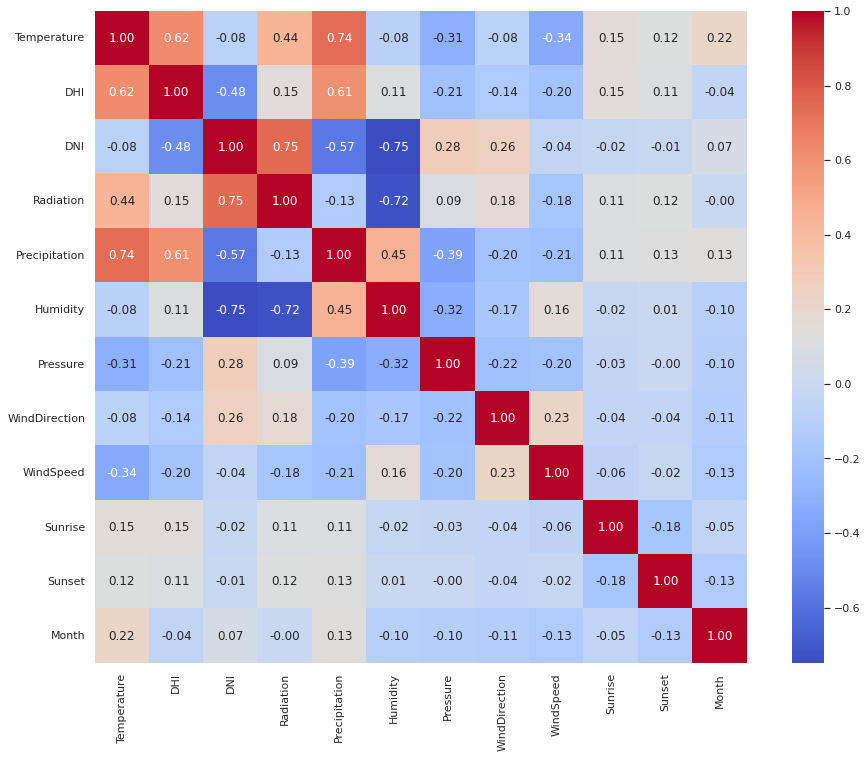

In [107]:
# values in the below matrix are visible due to the combination of mask, annot, and fmt

sns.heatmap(df_correlation, mask=np.zeros_like(df_correlation, dtype=np.bool), cmap='coolwarm',
            square=True, annot=True, fmt=".2f")

### Stationary Check of Radiation Series Data

In [109]:
Reference to AdfullerTest:
    https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

SyntaxError: invalid syntax (<ipython-input-109-207586673fb7>, line 1)

In [102]:
from statsmodels.tsa.stattools import adfuller

In [103]:
Xrad = df_init['Radiation'].values

In [104]:
result = adfuller(Xrad)

In [105]:
result

(-3.9438046440828707,
 0.0017351050968943333,
 13,
 1078,
 {'1%': -3.4364306491488814,
  '5%': -2.8642248442477976,
  '10%': -2.5681995044075987},
 13159.734337689255)

In [106]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

ADF Statistic: -3.943805
p-value: 0.001735
Critical Values:
